<a href="https://colab.research.google.com/github/marziyemahmoudifar/test2/blob/new1/apple_detection_faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

implementation of apple detection

In [1]:
%tensorflow_version 1.x
%matplotlib inline

TensorFlow 1.x selected.


import library

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )

Mounted at /content/gdrive/


In [4]:
!unzip gdrive/MyDrive/train.zip

Archive:  gdrive/MyDrive/train.zip
   creating: annotations_train/
  inflating: annotations_train/BD04_inf_201724_004_03_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_004_06_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_004_07_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_004_08_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_007_02_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_007_05_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_007_07_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_007_08_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_028_04_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_040_01_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_040_03_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_040_05_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_040_06_RGB.csv  
  inflating: annotations_train/BD04_inf_201724_040_07_RGB.csv  
  inflating: annotations_train/BD04_i

In [5]:
DATADIR = "RGBhr_train"
CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['BD11_inf_201710_003_04_RGBhr.jpg', 'BD11_sup_201710_055_09_RGBhr.jpg', 'BD04_inf_201726_006_09_RGBhr.jpg', 'BD12_inf_201711_098_02_RGBhr.jpg', 'BD11_sup_201710_049_08_RGBhr.jpg', 'BD12_sup_201711_009_02_RGBhr.jpg', 'BD11_sup_201710_154_02_RGBhr.jpg', 'BD11_sup_201710_109_07_RGBhr.jpg', 'BD12_inf_201711_164_01_RGBhr.jpg', 'BD11_inf_201710_132_01_RGBhr.jpg', 'BD12_inf_201711_116_09_RGBhr.jpg', 'BD12_inf_201711_161_07_RGBhr.jpg', 'BD11_inf_201710_033_06_RGBhr.jpg', 'BD11_inf_201710_015_04_RGBhr.jpg', 'BD11_inf_201710_138_09_RGBhr.jpg', 'BD12_inf_201711_110_02_RGBhr.jpg', 'BD04_inf_201724_028_04_RGBhr.jpg', 'BD12_inf_201711_038_03_RGBhr.jpg', 'BD12_inf_201711_107_08_RGBhr.jpg', 'BD11_sup_201710_064_08_RGBhr.jpg', 'BD11_inf_201710_042_08_RGBhr.jpg', 'BD11_sup_201710_157_03_RGBhr.jpg', 'BD11_inf_201710_006_03_RGBhr.jpg', 'BD12_sup_201711_027_01_RGBhr.jpg', 'BD11_inf_201710_084_04_RGBhr.jpg', 'BD12_inf_201711_110_04_RGBhr.jpg', 'BD11_inf_201710_063_06_RGBhr.jpg', 'BD11_inf_201710_138_04_RGB

In [6]:
path = "/content/RGBhr_train"
files = os.listdir(path)
print(files)

['BD11_inf_201710_003_04_RGBhr.jpg', 'BD11_sup_201710_055_09_RGBhr.jpg', 'BD04_inf_201726_006_09_RGBhr.jpg', 'BD12_inf_201711_098_02_RGBhr.jpg', 'BD11_sup_201710_049_08_RGBhr.jpg', 'BD12_sup_201711_009_02_RGBhr.jpg', 'BD11_sup_201710_154_02_RGBhr.jpg', 'BD11_sup_201710_109_07_RGBhr.jpg', 'BD12_inf_201711_164_01_RGBhr.jpg', 'BD11_inf_201710_132_01_RGBhr.jpg', 'BD12_inf_201711_116_09_RGBhr.jpg', 'BD12_inf_201711_161_07_RGBhr.jpg', 'BD11_inf_201710_033_06_RGBhr.jpg', 'BD11_inf_201710_015_04_RGBhr.jpg', 'BD11_inf_201710_138_09_RGBhr.jpg', 'BD12_inf_201711_110_02_RGBhr.jpg', 'BD04_inf_201724_028_04_RGBhr.jpg', 'BD12_inf_201711_038_03_RGBhr.jpg', 'BD12_inf_201711_107_08_RGBhr.jpg', 'BD11_sup_201710_064_08_RGBhr.jpg', 'BD11_inf_201710_042_08_RGBhr.jpg', 'BD11_sup_201710_157_03_RGBhr.jpg', 'BD11_inf_201710_006_03_RGBhr.jpg', 'BD12_sup_201711_027_01_RGBhr.jpg', 'BD11_inf_201710_084_04_RGBhr.jpg', 'BD12_inf_201711_110_04_RGBhr.jpg', 'BD11_inf_201710_063_06_RGBhr.jpg', 'BD11_inf_201710_138_04_RGB

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(548, 373)


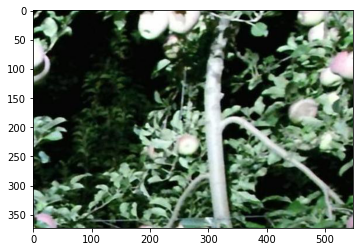

In [7]:
path = "/content/RGBhr_train"
#files = os.listdir(path)
#print(files)
#image=(files[0])
# load the image
img = load_img("/content/RGBhr_train/BD04_inf_201724_004_03_RGBhr.jpg")
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
from matplotlib.pyplot import imshow
plt.imshow(img)



In [8]:
!unzip gdrive/MyDrive/val.zip

Archive:  gdrive/MyDrive/val.zip
   creating: annotations_val/
  inflating: annotations_val/BD04_inf_201724_004_05_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_028_03_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_028_07_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_028_08_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_028_09_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_040_02_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_040_04_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_052_01_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_052_07_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_055_04_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_055_05_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_055_06_RGB.csv  
  inflating: annotations_val/BD04_inf_201724_055_09_RGB.csv  
  inflating: annotations_val/BD04_inf_201725_015_01_RGB.csv  
  inflating: annotations_val/BD04_inf_201726_006_02_RGB.csv  
  infla

In [10]:
path = "/content/RGBhr_val"
files = os.listdir(path)
print(files)


['BD12_inf_201711_014_02_RGBhr.jpg', 'BD12_inf_201711_053_07_RGBhr.jpg', 'BD12_sup_201711_063_06_RGBhr.jpg', 'BD04_inf_201724_028_09_RGBhr.jpg', 'BD11_inf_201710_006_06_RGBhr.jpg', 'BD11_sup_201710_118_04_RGBhr.jpg', 'BD11_inf_201710_054_03_RGBhr.jpg', 'BD12_inf_201711_047_06_RGBhr.jpg', 'BD12_inf_201711_104_05_RGBhr.jpg', 'BD11_inf_201710_096_03_RGBhr.jpg', 'BD11_inf_201710_129_07_RGBhr.jpg', 'BD12_inf_201711_023_04_RGBhr.jpg', 'BD12_inf_201711_113_02_RGBhr.jpg', 'BD11_sup_201710_013_08_RGBhr.jpg', 'BD12_inf_201711_092_05_RGBhr.jpg', 'BD11_sup_201710_157_09_RGBhr.jpg', 'BD12_sup_201711_150_01_RGBhr.jpg', 'BD12_inf_201711_038_07_RGBhr.jpg', 'BD12_inf_201711_023_06_RGBhr.jpg', 'BD11_sup_201710_043_04_RGBhr.jpg', 'BD12_sup_201711_090_01_RGBhr.jpg', 'BD12_sup_201711_027_07_RGBhr.jpg', 'BD12_sup_201711_150_02_RGBhr.jpg', 'BD12_sup_201711_057_07_RGBhr.jpg', 'BD12_sup_201711_063_07_RGBhr.jpg', 'BD12_inf_201711_017_05_RGBhr.jpg', 'BD12_inf_201711_113_01_RGBhr.jpg', 'BD12_sup_201711_009_01_RGB

In [11]:
!unzip "/content/gdrive/MyDrive/test.zip"

Archive:  /content/gdrive/MyDrive/test.zip
   creating: annotations_test/
  inflating: annotations_test/BD04_inf_201724_004_01_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_004_02_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_004_04_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_004_09_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_007_01_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_007_03_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_007_04_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_007_06_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_007_09_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_028_01_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_028_02_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_028_05_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_028_06_RGB.csv  
  inflating: annotations_test/BD04_inf_201724_040_09_RGB.csv  
  inflating: annotations_test/BD04_inf_20172

In [12]:
path = "/content/RGBhr_test"
files = os.listdir(path)
print(files)


['BD12_inf_201711_050_08_RGBhr.jpg', 'BD11_inf_201710_030_05_RGBhr.jpg', 'BD11_inf_201710_033_02_RGBhr.jpg', 'BD11_inf_201710_072_06_RGBhr.jpg', 'BD12_inf_201711_131_05_RGBhr.jpg', 'BD12_inf_201711_029_02_RGBhr.jpg', 'BD11_inf_201710_039_06_RGBhr.jpg', 'BD12_inf_201711_029_01_RGBhr.jpg', 'BD11_inf_201710_063_08_RGBhr.jpg', 'BD12_inf_201711_086_05_RGBhr.jpg', 'BD12_sup_201711_015_09_RGBhr.jpg', 'BD12_inf_201711_095_05_RGBhr.jpg', 'BD11_inf_201710_042_01_RGBhr.jpg', 'BD12_inf_201711_098_03_RGBhr.jpg', 'BD11_sup_201710_109_09_RGBhr.jpg', 'BD11_sup_201710_067_01_RGBhr.jpg', 'BD11_inf_201710_096_09_RGBhr.jpg', 'BD12_inf_201711_182_07_RGBhr.jpg', 'BD12_inf_201711_017_07_RGBhr.jpg', 'BD12_inf_201711_092_02_RGBhr.jpg', 'BD04_inf_201727_001_08_RGBhr.jpg', 'BD11_sup_201710_049_01_RGBhr.jpg', 'BD04_inf_201726_009_07_RGBhr.jpg', 'BD12_inf_201711_164_05_RGBhr.jpg', 'BD12_inf_201711_041_08_RGBhr.jpg', 'BD11_inf_201710_087_06_RGBhr.jpg', 'BD11_sup_201710_154_06_RGBhr.jpg', 'BD11_sup_201710_067_07_RGB

IndentationError: ignored